# Etiquetar valores en gráficas de Matplotlib

> _Preparado por: **Juan Javier Santos Ochoa** ([LNPP](https://www.lnpp.mx/))_. 
> Contacto: [web](https://www.jjsantoso.com/), [LinkedIn](https://www.linkedin.com/in/jsantosochoa/), [Twitter](https://twitter.com/jjsantoso)

* Algunas gráficas se ven mejor si se coloca una etiqueta con los valores a cada marca, por ejemplo, en las gráficas de dispersión para identificar cada punto  o en las gráficas de barras para hacer explícito la altura de cada barra.
* Desafortunadamente, en Matplotlib no existe una opción diseñada especificamente para eso, por lo que tenemos que usar los métodos `ax.annotate()` o `ax.text()` para añadir texto a los elementos de las gráficas.
* A continuación definimos unas funciones para etiquetar los valores de 3 tipos de gráficos: scatterplots, líneas y barras.

In [1]:
import sys
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline
print(sys.version)
print(pd.__name__, pd.__version__)
print(mpl.__name__, mpl.__version__)
plt.style.use('seaborn-white')

3.8.5 (default, Sep  3 2020, 21:29:08) [MSC v.1916 64 bit (AMD64)]
pandas 1.1.3
matplotlib 3.3.2


In [2]:
liga = pd.read_excel('datos/liga.xlsx')
liga.head()

,Pos,Club,JJ,JG,JE,JP,GF,GC,Dif,PTS,...,Dif.1,PTS.1,JJ.2,JG.2,JE.2,JP.2,GF.2,GC.2,Dif.2,PTS.2
0,1,Monterrey,16,13,2,1,43,13,30,41,...,19,21,8,6,2,0,17,6,11,20
1,2,América,16,12,2,2,29,10,19,38,...,14,21,8,5,2,1,11,6,5,17
2,3,UANL,16,11,3,2,36,12,24,36,...,16,20,8,5,1,2,15,7,8,16
3,4,Pachuca,16,11,3,2,33,13,20,36,...,15,20,8,5,1,2,17,12,5,16
4,5,Atlas,16,11,1,4,32,18,14,34,...,7,16,8,6,0,2,14,7,7,18


# Scatter plots

* La siguiente función se puede aplicar sobre un objeto `ax` después de hacer un scatterplot.
* Se debe suministrar el objeto `ax` y una lista con los textos que se mostrarán para cada punto.
* Los parámetros `xoffset` y `yoffset` ayudan a ajustar la posición horizontal y vertical, respectivamente, de todo texto en general.

In [3]:
def scatter_labels(ax, textos, xoffset=0, yoffset=5, **kwargs):
    """
        Esta función recibe una gráfica de líneas y pone etiquetas de valores sobre las líneas.
        ax: es el objeto axes.subplot que contiene las líneas
        textos: número de decimales que se muestran
        xoffset: valor en puntos para ajustar la posición horizontal del texto
        yoffset: valor en puntos para ajustar la posición vertical del texto
        **kwargs: son los demás parámetros que puede recibir ax.annotate().
    """
    for c in ax.collections:
        data = c.get_offsets()
        for x, y, t in zip(data[:, 0], data[:, 1], textos):
            ax.annotate(t, # texto
                         (x, y), # coordenadas del punto
                         textcoords="offset points", # tipo de coordenadas del texto
                         xytext=(xoffset, yoffset), # coordenadas del texto al punto
                        **kwargs # otros argumentos para annotations
                       ) 

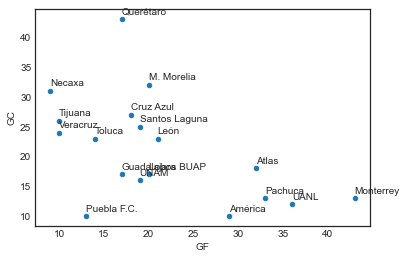

In [4]:
ax = liga.plot.scatter(x='GF', y='GC')
scatter_labels(ax, textos=liga['Club'])

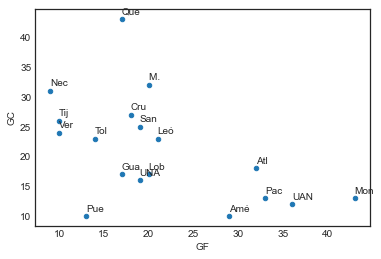

In [5]:
ax = liga.plot.scatter(x='GF', y='GC')
scatter_labels(ax, textos=liga['Club'].str[0:3])

* `color` y `alpha` son parámetros que recibe `ax.annotate()` a través de `**kwargs`.
* Puede consultar todas las opciones de annotate en la [página de matplotlib](https://matplotlib.org/stable/tutorials/text/annotations.html)

In [ ]:
ax = liga.plot.scatter(x='GF', y='GC')
scatter_labels(ax, textos=liga['Club'].str[0:3], xoffset=-10, yoffset=-10, color='red', alpha=0.5)

* una de las opciones de `anotate` es `arrowprops` para añadir flechas desde el texto hasta el punto. Esta opción recibe un diccionario con las [características de la flecha](https://matplotlib.org/stable/tutorials/text/annotations.html#annotating-with-arrow). 

In [ ]:
ax = liga.plot.scatter(x='GF', y='GC')
scatter_labels(ax, textos=liga['Club'].str[0:3], xoffset=20, arrowprops=dict(color='red', arrowstyle="->"))

## AdjustText

* [AdjustText](https://github.com/Phlya/adjustText/) es una herramienta que nos ayuda a ajustar las etiquetas de texto de una gráfica para evitar que se traslapen entre ellas y con otros elementos del gráfico.

* Se instala con:
    
    `pip install adjustText`

In [6]:
from adjustText import adjust_text

* Primero creamos la gráfica y las etiquetas de los valores

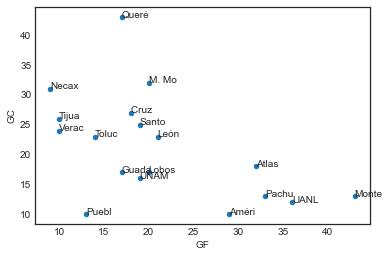

In [8]:
ax = liga.plot.scatter(x='GF', y='GC')
scatter_labels(ax, textos=liga['Club'].str[0:5], xoffset=0, yoffset=0)

* luego le pasamos los objetos de texto a la función `adjust_text`.
* La opción `lim` controla el número de iteraciones que se realizarán para encontrar la ubicación óptima. Dependiendo de cada caso se puede aumentar o disminuir.

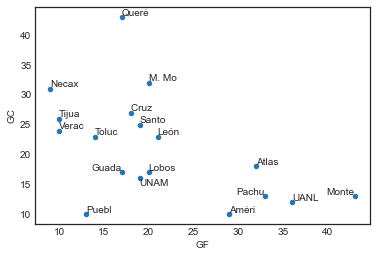

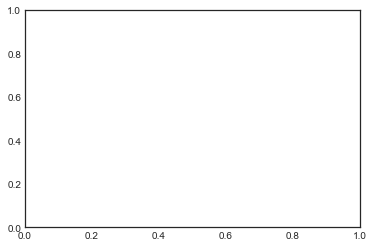

In [9]:
adjust_text(ax.texts, lim=20)
ax.figure

* Todos los objetos de texto que agregamos se guardan en el atributo `ax.texts`. Si fuera necesario, podríamos modificar individualmente algunos de ellos.
* Por ejemplo, acá vamos a resaltar los equipos de la Ciudad de México y a atenuar todos los demás.

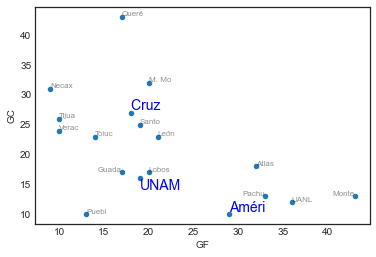

In [10]:
resaltar = ['UNAM', 'Cruz ', 'Améri']
for t in ax.texts:
    if t.get_text() in resaltar:
        t.set(color='blue', size=14)
    else:
        t.set(alpha=0.5, size=8)
ax.figure

# Líneas
* La función para poner etiquetas de valores en las líneas es parecida a la anterior, sin embargo hay otras opciones que podemos agregar para personalizar los valores que se muestran.

In [11]:
def lines_labels(ax, decimals=0, ha='center', prefix='', suffix='', xoffset=0, yoffset=5, color_line=False, **kwargs):
    """
        Esta función recibe una gráfica de líneas y pone etiquetas de valores sobre las líneas.
        ax: es el objeto axes.subplot que contiene las líneas
        decimals: número de decimales que se muestran
        ha: alineación horizontal del texto. Puede ser 'center', 'left' o 'right'
        prefix: símbolo de texto que se añade antes del valor numérico
        suffix: símbolo de texto que se añade después del valor numérico
        xoffset: valor en puntos para ajustar la posición horizontal del texto
        yoffset: valor en puntos para ajustar la posición vertical del texto
        color_line: valor booleano que indica si las etiquetas tendrán el mismo color de la línea que representan
        **kwargs: son los demás parámetros que puede recibir ax.annotate().
    """
    for l in ax.lines:
        data = l.get_data()
        for x, y in zip(data[0], data[1]):
            template = prefix + f"{{:.{decimals}f}}" + suffix
            label = template.format(y)
            color = l.get_color() if color_line else 'k'
            ax.annotate(label, # this is the text
                         (x, y), # this is the point to label
                         textcoords="offset points", # how to position the text
                         xytext=(xoffset, yoffset), # distance from text to points (x,y)
                        ha=ha,
                        color=color,
                        **kwargs
                       )

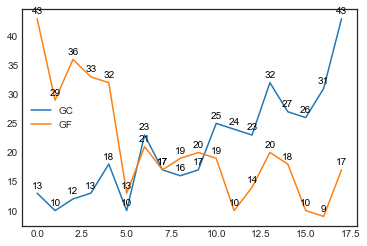

In [12]:
ax = liga.plot(y=['GC', 'GF'])
lines_labels(ax)

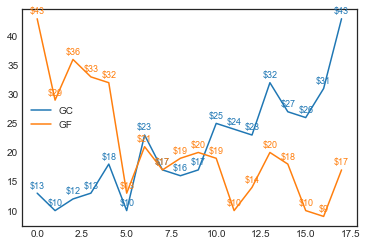

In [13]:
ax = liga.plot(y=['GC', 'GF'])
lines_labels(ax, prefix='$', color_line=True, fontsize=9)

# Barras
* La siguiente función ayuda a poner etiquetas de valores encima de las barras.

In [14]:
def show_values_on_bars(axs, h_v="v", decimals=1, prefix='', suffix='', xoffset=0, yoffset=0, ha="center", va="center", bar_colors=False, **kwargs):
    """
    Esta función recibe una gráfica de barras y pone etiquetas de valores sobre las barras.
    ax: es el objeto axes.subplot que contiene las líneas
    h_v: indica si la gráfica es de barras horizontales ('h') o verticales ('v')
    decimals: número de decimales que se muestran
    prefix: símbolo de texto que se añade antes del valor numérico
    suffix: símbolo de texto que se añade después del valor numérico
    xoffset: valor en puntos para ajustar la posición horizontal del texto
    yoffset: valor en puntos para ajustar la posición vertical del texto
    ha: alineación horizontal del texto. Puede ser 'center', 'left' o 'right'
    va: alineación vertical del texto. Puede ser 'center', 'top' o 'bottom'
    bar_colors: valor booleano que indica si las etiquetas tendrán el mismo color de la barra que representan
    **kwargs: son los demás parámetros que puede recibir ax.annotate().
    """
    def _show_on_single_plot(ax):
        template = f'{prefix}{{0:.{decimals}f}}{suffix}'
        if h_v == "v":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height() 
                if pd.notnull(p.get_height()):
                    label = label = template.format(p.get_height())
                    color = p.get_fc() if bar_colors else 'k'
                    _anota(ax, _x, _y, label, color=color, **kwargs)
        elif h_v == "h":
            for p in ax.patches:
                _x = p.get_x() + p.get_width()
                _y = p.get_y() + p.get_height() / 2
                if pd.notnull(p.get_width()):
                    label = template.format(p.get_width())
                    color = p.get_fc() if bar_colors else 'k'
                    _anota(ax, _x, _y, label, color=color, **kwargs)

    def _anota(ax, x, y, label, color, **kwargs):
        ax.annotate(label, xy=(x, y), xytext=(xoffset, yoffset), textcoords="offset points", ha=ha, va=va, color=color, **kwargs)
        
    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_single_plot(ax)
    else:
        _show_on_single_plot(axs)


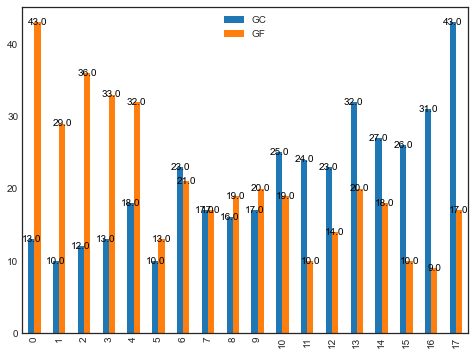

In [15]:
ax = liga.plot.bar(y=['GC', 'GF'], figsize=(8, 6))
show_values_on_bars(ax)

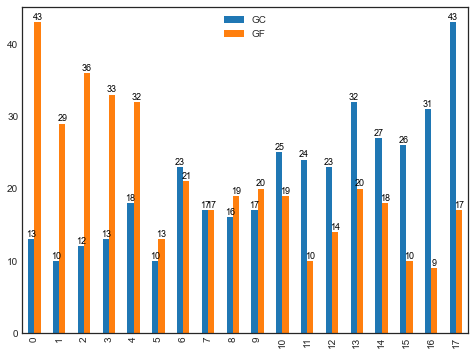

In [16]:
ax = liga.plot.bar(y=['GC', 'GF'], figsize=(8, 6))
show_values_on_bars(ax, decimals=0, yoffset=5, fontsize=9)

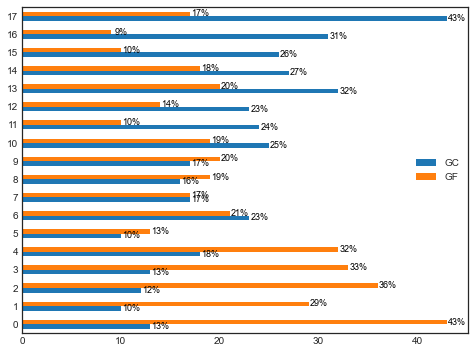

In [17]:
ax = liga.plot.barh(y=['GC', 'GF'], figsize=(8, 6))
show_values_on_bars(ax, h_v='h', decimals=0, xoffset=10, fontsize=9, suffix='%')

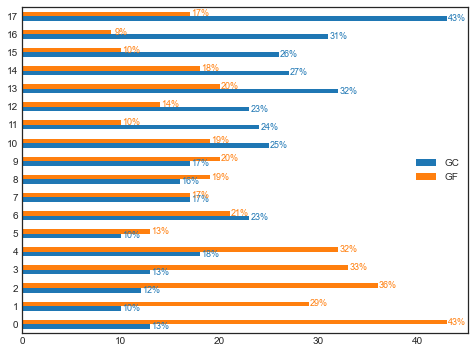

In [18]:
ax = liga.plot.barh(y=['GC', 'GF'], figsize=(8, 6))
show_values_on_bars(ax, h_v='h', decimals=0, xoffset=10, fontsize=9, suffix='%', bar_colors=True)